# Importing Packages

#### Basic-Packages

In [172]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

##### plt - alteration

In [173]:
plt.rcParams['font.size'] =14
plt.rcParams['font.weight']= 'bold'
plt.style.use('seaborn-whitegrid')

##### warnings

In [174]:
import warnings

pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

# Loading DataSet

In [175]:
data = pd.read_csv("DataSet/data1.csv")
data.head()

,x,y
0,17,94
1,13,73
2,12,59
3,15,80
4,16,93


# Info About the DataFrame

In [176]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   x       120 non-null    int64
 1   y       120 non-null    int64
dtypes: int64(2)
memory usage: 2.0 KB


In [177]:
print(f"Records:{data.shape[0]}\nFeatures:{data.shape[1]}")

Records:120
Features:2


# Data Analysis

### Basic statistics

In [178]:
data.describe().style.background_gradient(cmap='hot')

,x,y
count,120.000000,120.000000
mean,15.600000,79.700000
std,2.067760,11.028306
min,12.000000,59.000000
25%,14.000000,73.000000
50%,16.000000,79.500000
75%,17.000000,91.000000
max,19.000000,94.000000


### Corelation

<AxesSubplot:>

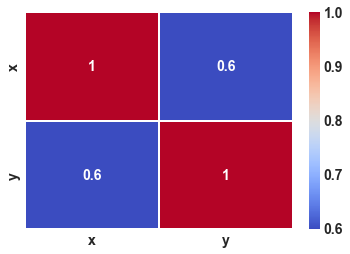

In [179]:
sns.heatmap(data.corr(),annot=True,linewidths=0.2,cmap='coolwarm')

### Distribution of Features

Text(0.5, 1.0, 'Distribution of y variable')

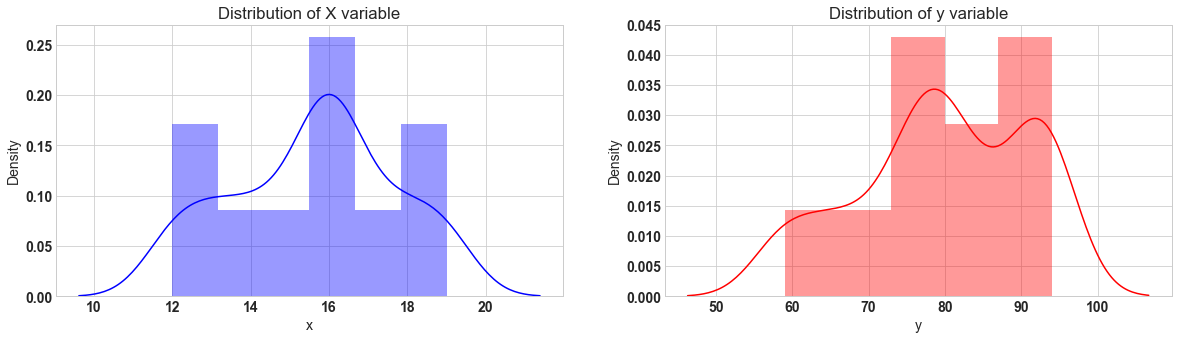

In [180]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(20,5))
sns.distplot(data['x'],color='b',ax=ax1)
ax1.set_title("Distribution of X variable")
sns.distplot(data['y'],color='r',ax=ax2)
ax2.set_title("Distribution of y variable")

In [181]:
x = data['x']
y = data['y']

# Simple Linear Regression
### y = m * x + c
- m = slope
- c = intercept

# Train Test Split

In [182]:
shuffle_data = data.sample(frac=1)
train_size = int(0.7 * len(data))
train_set = shuffle_data[:train_size]
test_set = shuffle_data[train_size:]

In [183]:
print(f"Shape of Training Set : {train_set.shape}\nShape of Testing Set : {test_set.shape}")

Shape of Training Set : (84, 2)
Shape of Testing Set : (36, 2)


In [184]:
x_train = train_set['x']
x_test = test_set['x']
y_train = train_set['y']
y_test = test_set['y']

# Simple Linear Model

In [185]:
def simple_linear_regression(input_feature,output):
    Xi = input_feature
    Yi = output
    N = len(Xi)
    
    Yi_mean = Yi.mean()
    Xi_mean = Xi.mean()
    
    S_YiXi = (Yi*Xi).sum()
    Yi_Xi_ByN = (Yi.sum() * Xi.sum()) / N
    
    S_XiXi = (Xi*Xi).sum()
    XiXi_ByN = (Xi.sum() * Xi.sum()) / N
    
    slope = (S_YiXi - Yi_Xi_ByN) / (S_XiXi - XiXi_ByN)
    
    intercept = Yi_mean - slope * Xi_mean
    
    return (intercept,slope)

### Finding Slope and Intercept for Training Data

In [186]:
train_intercept , train_slope = simple_linear_regression(x_train,y_train)

print ("Intercept",train_intercept)
print ("Slope",train_slope)

Intercept 26.80996523754328
Slope 3.3568945538818187


### Equation of the best fit

In [187]:
print ("Y =",train_intercept,"*X +",train_slope)

Y = 26.80996523754328 *X + 3.3568945538818187


### Plotting Regression Line in the Training Data

Text(0, 0.5, 'Y')

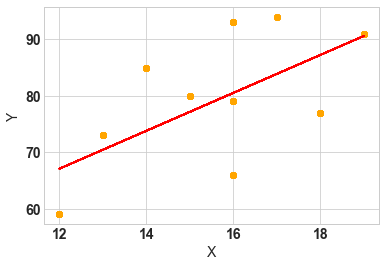

In [188]:
plt.scatter(x_train,y_train,color='orange')
plt.plot(x_train,train_slope*x_train+train_intercept,'r')
plt.xlabel("X")
plt.ylabel("Y")

# Model Prediction

In [189]:
def get_regression_predictions(input_features,intercept,slope):
    predicted_values = input_features*slope + intercept
    
    return predicted_values

### Predicting for a random test point

In [190]:
my_test_point = 20

estimatd_point = get_regression_predictions(my_test_point,train_intercept,train_slope)
print ("Estimated Value of Y :",estimatd_point)

Estimated Value of Y : 93.94785631517965


### Prediction - Test Data Points

In [191]:
y_pred = get_regression_predictions(x_test,train_intercept,train_slope)
y_pred[:5]

83    77.163384
45    73.806489
95    73.806489
67    80.520278
38    87.234067
Name: x, dtype: float64

In [192]:
y_test[:5]

83    80
45    85
95    85
67    79
38    77
Name: y, dtype: int64

# Residual Sum of Squares

In [193]:
def residual_sum_of_squares(y_test,y_pred):
    residual = y_test - y_pred
    
    RSS = (residual*residual).sum()
    
    return (RSS)

In [194]:
#RSS
residual_sum_of_squares(y_test,y_pred)

3196.9462585043193

# R - Squared

In [195]:
def R_Squared(y_test,y_pred):
    
    residual = y_test - y_pred
    
    RES = (residual*residual).sum()
    
    REST = y_test - y_test.mean()
    
    TOT = (REST*REST).sum()
    
    return (1 - RES/TOT)

In [196]:
R_Squared(y_test,y_pred)

0.06345562376997349

In [197]:
def Mean_Absolute_Error(y_test,y_pred):
    Yi = y_test
    
    var = (Yi - y_pred).abs().sum()
    
    MAE = var/len(Yi)
    
    return MAE

In [198]:
Mean_Absolute_Error(y_test,y_pred)

7.972190034762461

In [199]:
def Mean_Absolute_Percentage_Error(y_test,y_pred):    
    Yi = y_test
    
    var = ((Yi - y_pred)/Yi).abs().sum()
    
    MAPE = var/len(Yi) *100
    
    return MAPE

In [200]:
Mean_Absolute_Percentage_Error(y_test,y_pred)

10.055034140141766

# Model Evaluation

In [209]:
m_per_dict = {'Mean_Absolute_Percentage_Error':Mean_Absolute_Percentage_Error(y_test,y_pred),"Mean_Absolute_Error":Mean_Absolute_Error(y_test,y_pred),"R_Squared":R_Squared(y_test,y_pred),"residual_sum_of_squares":residual_sum_of_squares(y_test,y_pred)}
model_performance = pd.DataFrame(m_per_dict,index=['Values'])
model_performance

,Mean_Absolute_Percentage_Error,Mean_Absolute_Error,R_Squared,residual_sum_of_squares
Values,10.055034,7.97219,0.063456,3196.946259


### Line of Best Fit

In [224]:
LOBF = "Y =",train_intercept,"*X +",train_slope
LOBF

('Y =', 26.80996523754328, '*X +', 3.3568945538818187)

# Sklearn

##### Importing Packages

In [211]:
from sklearn.metrics import mean_absolute_percentage_error,r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression

##### Spliting and Model Building

In [215]:
x_train= x_train.reshape(-1, 1)
x_test = x_test.values.reshape(-1, 1)
LR = LinearRegression()
LR.fit(x_train,y_train)
y_pred_sk = LR.predict(x_test)

In [216]:
y_pred_sk[:5]

array([77.16338355, 73.80648899, 73.80648899, 80.5202781 , 87.23406721])

### Model Performance Evaluation

In [217]:
m_per_dict_sk = {'Mean_Absolute_Percentage_Error':mean_absolute_percentage_error(y_test,y_pred_sk)*100,"Mean_Absolute_Error":mean_absolute_error(y_test,y_pred_sk),"R_Squared":r2_score(y_test,y_pred_sk),"residual_sum_of_squares":residual_sum_of_squares(y_test,y_pred_sk)}
model_performance_sk = pd.DataFrame(m_per_dict_sk,index=['Values'])
model_performance_sk

,Mean_Absolute_Percentage_Error,Mean_Absolute_Error,R_Squared,residual_sum_of_squares
Values,10.055034,7.97219,0.063456,3196.946259


### Line Of Best Fit using Sklearn

In [223]:
LOBF_sk = "Y =",LR.intercept_,"*X +",LR.coef_
LOBF_sk

('Y =', 26.80996523754348, '*X +', array([3.35689455]))

### Visualization of Best Fitted Line

Text(0, 0.5, 'Y')

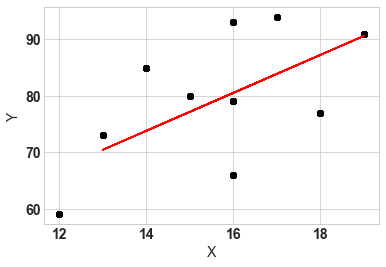

In [232]:
plt.scatter(x_train,y_train,color='black')
plt.plot(x_test,y_pred_sk,'r')
plt.xlabel("X")
plt.ylabel("Y")

In [233]:
jupyter nbconvert --to html Muthu_Palaniappan_M_EX_1_Simple_Regression_Scratch.ipynb  

SyntaxError: invalid syntax (249407438.py, line 1)